In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
# Data Loading (수술  사망 데이터)
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [8]:
# Data Checking
col = []
missing = []
level = []
for name in data.columns:

    # Missing
    missper = data[name].isnull().sum() / data.shape[0]
    missing.append(round(missper, 4))

    # Leveling
    lel = data[name].dropna()
    level.append(len(list(set(lel))))

    # Columns
    col.append(name)

summary = pd.concat([pd.DataFrame(col, columns=['name']),
                     pd.DataFrame(missing, columns=['Missing Percentage']),
                     pd.DataFrame(level, columns=['Level'])], axis=1)


In [9]:
drop_col = summary['name'][(summary['Level'] <= 1) | (summary['Missing Percentage'] >= 0.8)]
data.drop(columns=drop_col, inplace=True)
print(f"Data Shape : {data.shape}")

Data Shape : (532, 22)


In [10]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

In [11]:
# Scaling
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [12]:
# 시각화를 위한 차원축소
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(f"PCA Variance : {pca.explained_variance_ratio_}")

PCA Variance : [0.45933235 0.26652713]


## Spectral Clustering
  - Hyperparameter Tuning using for Loop

## Spectral Clustering Parameters
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
  - n_clusters : Cluster 개수 (K)
  - affinity : 유사도 행렬 만드는 방법
    - ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
    - ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
       - Gaussian Kernel
    - ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate greater similarity between instances.
    - ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance.
  - n_neighbors : 유사도 계산시 주변 n개를 보고 판단할 것 인지
    - Number of neighbors to use when constructing the affinity matrix using the nearest neighbors method. Ignored for affinity='rbf'

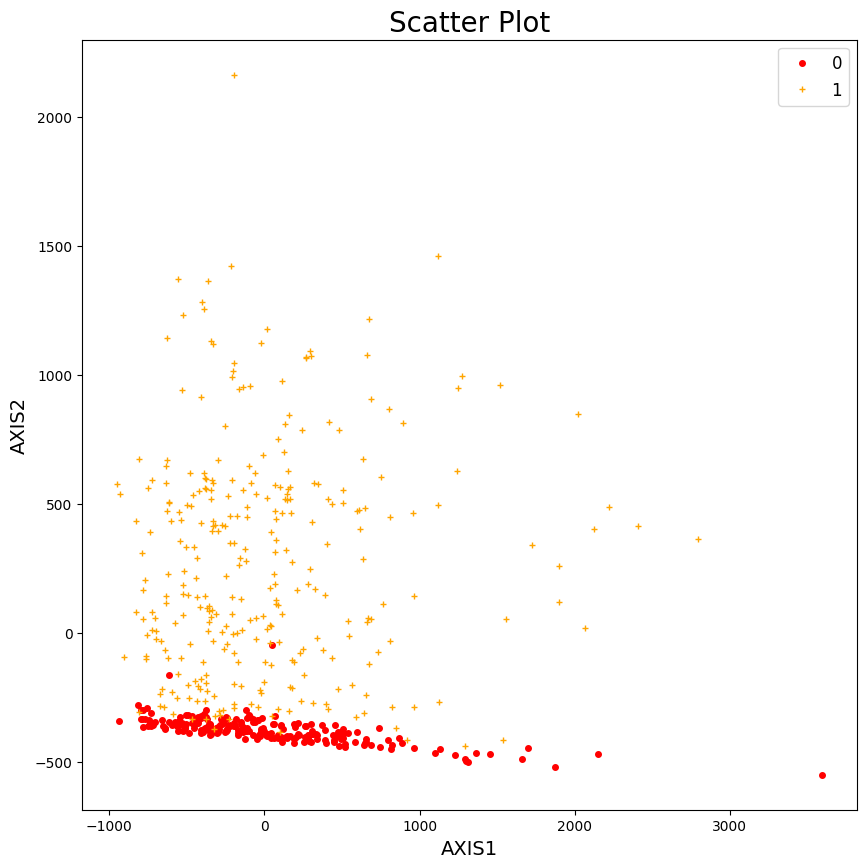

---------------------------------------------------------------------------------------------------


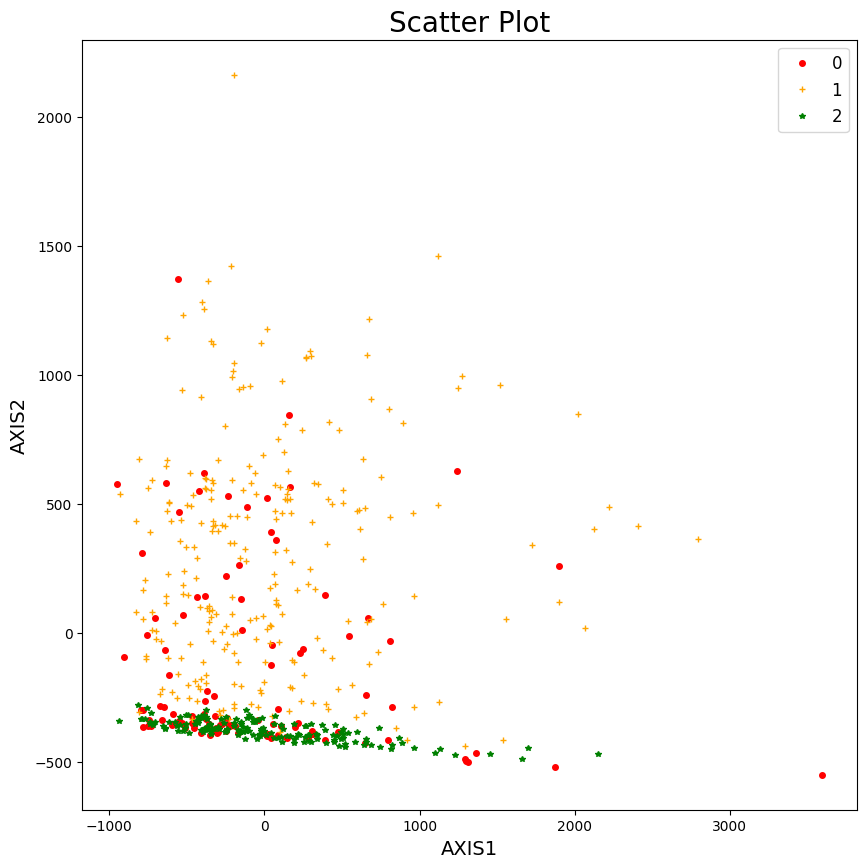

---------------------------------------------------------------------------------------------------


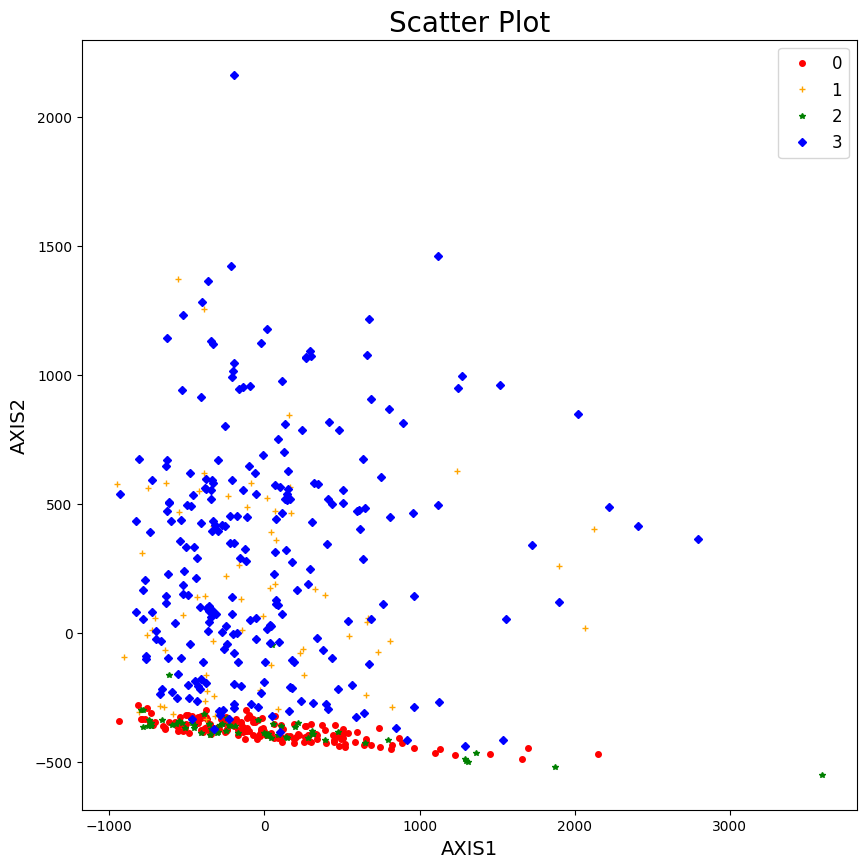

---------------------------------------------------------------------------------------------------


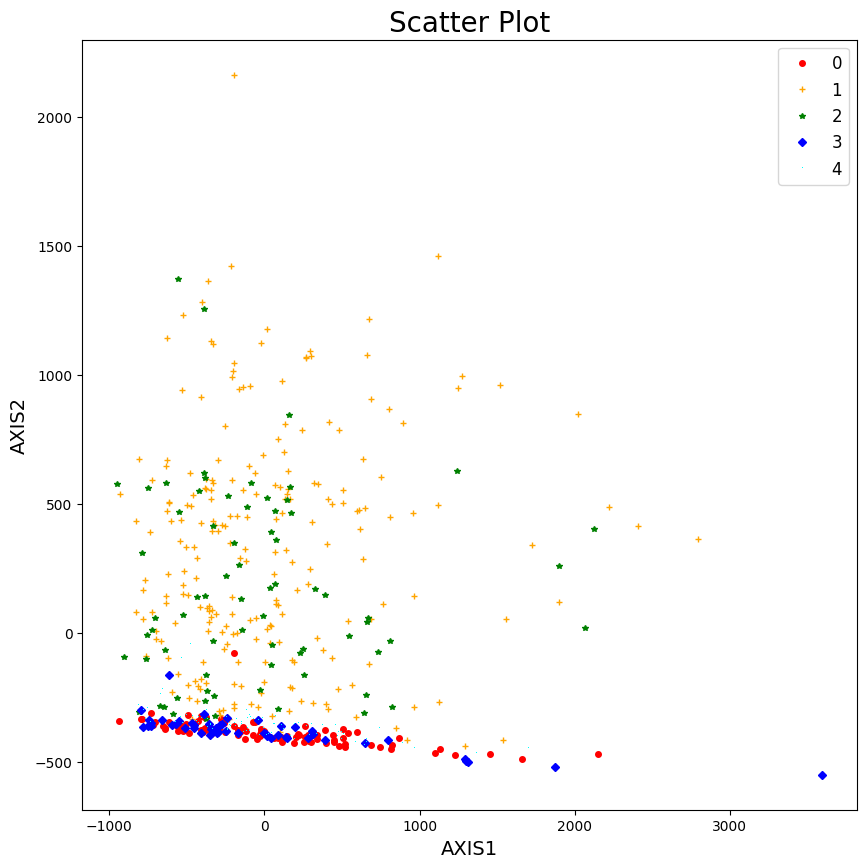

---------------------------------------------------------------------------------------------------


In [13]:
# Spectral Clustering Modeling
for cluster in list(range(2, 6)):
    # 예측 안됨. 새로운 데이터가 들어온다면 처음부터 다시 계산해야함
    Cluster = SpectralClustering(n_clusters=cluster).fit(X_scal)
    labels = Cluster.labels_

    # label Add to DataFrame
    data[f'{cluster} label'] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    # Plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yellow', 'grey', 'orchid', 'lightpink']

    fig, ax = plt.subplots(figsize=(10,10))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'],
                group['AXIS2'],
                marker=mar[j],
                linestyle='',
                label=name,
                c = colo[j],
                ms=4)
        ax.legend(fontsize=12, loc='upper right') # legend position
    plt.title('Scatter Plot', fontsize=20)
    plt.xlabel('AXIS1', fontsize=14)
    plt.ylabel('AXIS2', fontsize=14)
    plt.show()
    print("---------------------------------------------------------------------------------------------------")

    gc.collect()

In [14]:
# Confusion Matrix 확인
cm = confusion_matrix(data['censor'], data['2 label'])
print(cm)

[[166 185]
 [ 59 122]]
